<a href="https://colab.research.google.com/github/Madara123455/Energy-DA-for-Petroleum/blob/main/Inflow_Performance_Relationship_(IPR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

### In a Unsaturated Reservoir :
> Bottom-hole pressure ($P_{wf}$) declines linearly with increase in Flow rate i.e Q (in STB/day) until it reaches $P_{b}$ and declines non linearly.

> Obviously in this type of reservoir $P_{r}$ > $P_{b}$

### In a Saturated Reservoir :
> Bottom-hole pressure ($P_{wf}$) declines non linearly with increase in Flow rate i.e Q (in STB/day) .

> Obviously in this type of reservoir $P_{r}$ = $P_{b}$ .

This non linearity can be found out using several emperical that are designed to generate the current and future inflow performance relationships:

 - Vogel’s Method
 - Fetkovich’s Method

There are several others like :
 - Wiggins’ Method
 - Standing’s Method
 - The Klins-Clark Method




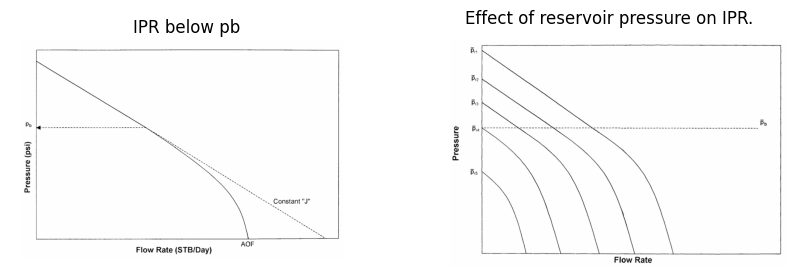


 (Courtesy - Tarek Ahmed)


In [6]:
img1 = mpimg.imread('/content/Screenshot 2025-05-30 210936.png')
img2 = mpimg.imread('/content/Screenshot 2025-06-01 000527.png')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off')
plt.title('IPR below pb')


plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis('off')
plt.title('Effect of reservoir pressure on IPR.')
plt.show()

print('\n (Courtesy - Tarek Ahmed)')

### Problem 1 :         

A well is producing from a saturated reservoir with an average reservoir pressure of 2500 psig. Stabilized production test data indicated that the stabilized rate and wellbore pressure are 350 STB/day and 2000 psig, respectively. Calculate:

- Oil flow rate at pwf=1850 psig
- Calculate oil flow rate assuming constant J
- Construct the IPR by using Vogel’s method and the constant productivity index approach.

In [7]:
print('Thus from the following question , we infer the following:')

p_r = float(2500)
q_0 = float(350)
p_wf_0 = float(2000)

print('According to Vogel \'s relation it states:')

q_max = q_0 / (1 - 0.2*(p_wf_0/p_r)-0.8*(p_wf_0/p_r)**2)
print(f'The value of Q(max) i.e AOF is {round(q_max,2)}')

Thus from the following question , we infer the following:
According to Vogel 's relation it states:
The value of Q(max) i.e AOF is 1067.07


In [8]:

def Vogel(p_wf):
  q = q_max * (1 - 0.2*(p_wf/p_r)-0.8*(p_wf/p_r)**2)
  return q

Pwf = float(input("Enter Bottom Hole Flowing Pressure (in psig): "))
Q = Vogel(Pwf)
print(f'Thus the value of Q for (P_wf = {Pwf} psig) is {round(Q,2)} STB/day')

Enter Bottom Hole Flowing Pressure (in psig): 1850
Thus the value of Q for (P_wf = 1850.0 psig) is 441.68 STB/day


In [9]:
J = 0
def constant_J(p_wf):
  J = q_0 / (p_r - p_wf_0)
  q = J * (p_r - p_wf)
  return q

Pwf = float(input("Enter Bottom Hole Flowing Pressure (in psig): "))
Q_J = constant_J(Pwf)
print(f'Thus the value of Q for (P_wf = {Pwf} psig) is {round(Q_J,2)} STB/day')

Enter Bottom Hole Flowing Pressure (in psig): 1850
Thus the value of Q for (P_wf = 1850.0 psig) is 455.0 STB/day


In [10]:
pressures = np.linspace(2500,0,20)
pressures

array([2500.        , 2368.42105263, 2236.84210526, 2105.26315789,
       1973.68421053, 1842.10526316, 1710.52631579, 1578.94736842,
       1447.36842105, 1315.78947368, 1184.21052632, 1052.63157895,
        921.05263158,  789.47368421,  657.89473684,  526.31578947,
        394.73684211,  263.15789474,  131.57894737,    0.        ])

In [11]:
flow_rates = []
for i in pressures:
  flow_rates.append(Vogel(i))

df = pd.DataFrame()
df["pressures"] = pressures
df["Q_Vogel"] = flow_rates
df.head(7)


,pressures,Q_Vogel
0,2500.000000,0.000000
1,2368.421053,98.726437
2,2236.842105,192.723465
3,2105.263158,281.991082
4,1973.684211,366.529289
5,1842.105263,446.338085
6,1710.526316,521.417472


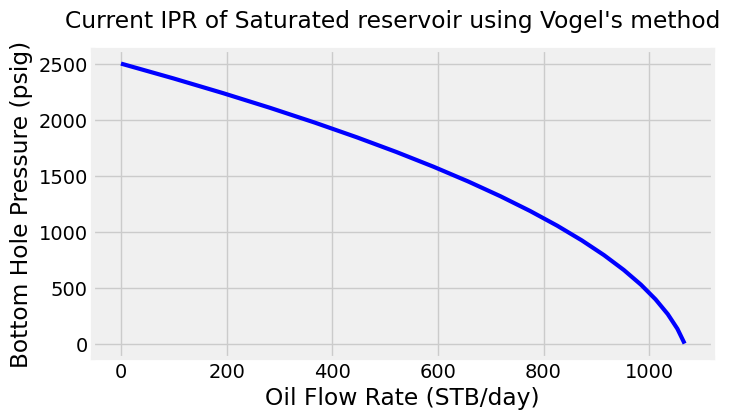

In [12]:

plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')

plt.plot(flow_rates, pressures , color = 'b' , linewidth = 3)
plt.xlabel('Oil Flow Rate (STB/day)')
plt.ylabel('Bottom Hole Pressure (psig)')
plt.suptitle('Current IPR of Saturated reservoir using Vogel\'s method')
plt.grid(True)
plt.show()

#### Undersaturated Reservoir:

####Problem 2:

> An oil well is producing from an undersaturated reservoir that is char
acterized by a bubble-point pressure of 2130 psig. The current average
 reservoir pressure is 3000 psig. Available flow test data shows that the
 well produced 250 STB/day at a stabilized pwf of 2500 psig. Construct
 the IPR data.


In [13]:
print('From the given data we have :')
p_b = float(2130)
p_r = float(3000)
q_0 = float(250)
p_wf_0 = float(2500)

From the given data we have :


In [24]:
Q_b = constant_J(2130)   ## Flow rate at bubble point
print(f'Hence Flow rate at bubble point is {Q_b}')

pressures_above_pb = np.linspace(3000,p_b,10)
pressures_less_pb = np.linspace(p_b,0,10)
flow_rates_above_Pb = []
flow_rates_below_Pb = []

def undersaturated_vogel_ipr(pwf):
  q = Q_b + (((J*p_b)/1.8)*(1 - 0.2*(pwf/p_r)-0.8*(pwf/p_r)**2))
  return q

for i in pressures:
  if i >= p_b:
    flow_rates_above_Pb.append(constant_J(i))
  else:
    flow_rates_below_Pb.append(undersaturated_vogel_ipr(i))

s1 = pd.Series(pressures)
s2 = pd.Series(flow_rates_above_Pb)
s3 = pd.Series(flow_rates_above_Pb)


# Combine into DataFrame (column-wise)
df = pd.concat([s1,s2, s3], axis=1)
df.columns = ['Pwf', 'Q > Pb', 'Q < Pb']
df.head(7)





Hence Flow rate at bubble point is 435.0


,Pwf,Q > Pb,Q < Pb
0,3000.000000,0.000000,0.000000
1,2842.105263,78.947368,78.947368
2,2684.210526,157.894737,157.894737
3,2526.315789,236.842105,236.842105
4,2368.421053,315.789474,315.789474
5,2210.526316,394.736842,394.736842
6,2052.631579,NaN,NaN


ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

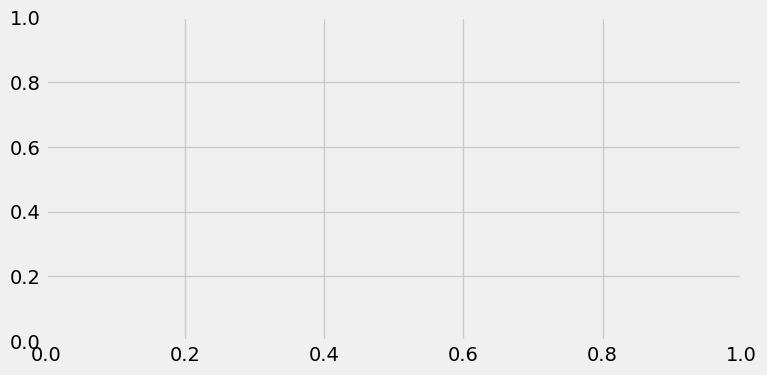

In [25]:
plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(flow_rates_above_Pb, pressures_above_pb , color = 'b' , linewidth = 3, label='IPR for Pwf>Pb')
plt.plot(flow_rates_below_Pb, pressures_less_pb , color = 'r' , linewidth = 3, label='IPR for Pwf<Pb')
plt.grid(True)
plt.xlim(right=1200)
plt.xlabel('Oil Flow Rate (STB/day)')
plt.ylabel('Bottom Hole Pressure (psig)')
plt.suptitle('Current IPR of Undersaturated reservoir using Vogel\'s method')
plt.legend()
plt.show()